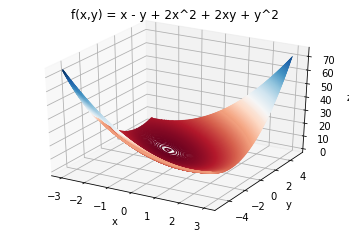

In [1]:
# Plot f(x,y) = x - y + 2x^2 + 2xy + y^2
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sn
%matplotlib inline
def f(x,y):
    return x-y+2*x**2+2*x*y+y**2

x=np.linspace(-3,3,30)
y=np.linspace(-5,5,30)
X,Y=np.meshgrid(x,y)
Z=f(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z,650, cmap='RdBu') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('f(x,y) = x - y + 2x^2 + 2xy + y^2')
plt.show()





In [2]:
# Minimize f(x,y) = x - y + 2x^2 + 2xy + y^2
def df(x,y): # this function taken in the value of x & y and  returns the derivative of F(x,y) w.r.t to x & y
    x_deriv=4*x+2*y+1
    y_deriv=2*x+2*y-1
    return np.array([ x_deriv,y_deriv])

def grad_descent(df,x_prev,l_r): # This is the step function.l_r =learning rate 
    precision=0.001
    iteration=1
    seq_x=[] # Create empty list where updated values of x& y will be appended after each iteration
    seq_y=[]
    x_next = np.subtract(x_prev, l_r*df(x_prev[0],x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev))>precision: # loop till the desired value of presicion is reached
    
        x_prev=x_next
        x_next = x_prev - l_r*df(x_prev[0],x_prev[1])
        iteration += 1
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    return (x_next,iteration,seq_x,seq_y)

grad_output=grad_descent(df,np.array([6,2]),0.2)
print('Min ',grad_output[0])


Min  [-0.99733921  1.49569475]


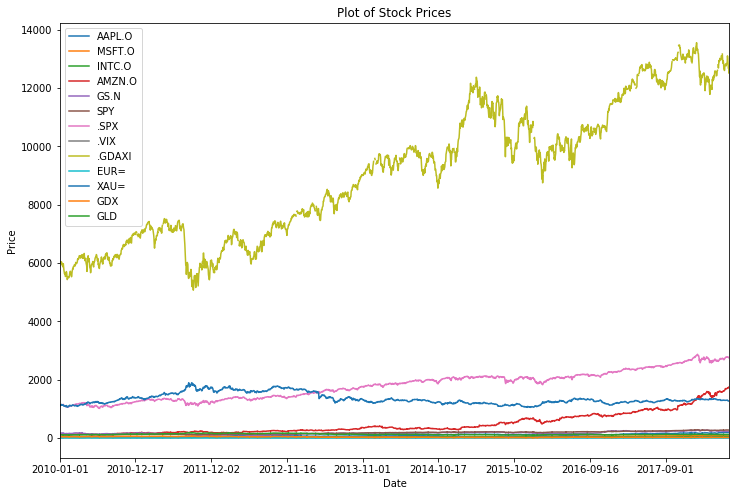

In [3]:
data=pd.read_csv('stocks.csv',index_col='Date') 
data.head()
data.plot(figsize=(12,8));
plt.title('Plot of Stock Prices')
plt.ylabel('Price')
plt.xlabel('Date');

In [7]:
data.dropna(inplace=True)
daily_returns=np.log(data/data.shift(1))*100# calculating % change of daily returns.
print(daily_returns)
daily_returns.describe()



              AAPL.O    MSFT.O    INTC.O    AMZN.O      GS.N       SPY  \
Date                                                                     
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-05  0.172740  0.032305 -0.047904  0.588259  1.752522  0.264364   
2010-01-06 -1.603420 -0.615586 -0.335973 -1.828177 -1.073070  0.070379   
2010-01-07 -0.185031 -1.038852 -0.966191 -1.715962  1.937946  0.421238   
2010-01-08  0.662630  0.680720  1.110318  2.671683 -1.909257  0.332226   
...              ...       ...       ...       ...       ...       ...   
2018-06-18 -0.052969  0.726407 -3.489692  0.454684 -0.228789 -0.205891   
2018-06-19 -1.629179  0.000000 -0.546398  0.635525 -1.335644 -0.384017   
2018-06-20  0.435262  0.996407  0.996342  0.878090 -0.219231  0.170454   
2018-06-21 -0.559201 -0.719179 -2.404281 -1.141293 -0.369394 -0.628853   
2018-06-22 -0.291593 -0.724389  0.592226 -0.844489 -0.423842  0.182156   

                .SPX       .VIX    .G

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,.GDAXI,EUR=,XAU=,GDX,GLD
count,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000
mean,0.085828,0.056122,0.043969,0.121624,0.012726,0.042228,0.042371,-0.017894,0.034922,-0.010122,0.005937,-0.036526,0.004371
std,1.609121,1.431495,1.503509,1.960533,1.675336,0.942466,0.944820,7.791629,1.246675,0.597941,1.020125,2.397451,1.027450
min,-13.187492,-12.103323,-9.543236,-13.532540,-13.686280,-6.734058,-6.895833,-43.675957,-7.067271,-2.653083,-8.878704,-12.176371,-9.190508
25%,-0.694940,-0.676792,-0.781254,-0.832629,-0.840032,-0.347095,-0.338504,-4.189094,-0.569680,-0.359858,-0.512203,-1.369526,-0.513892
50%,0.075593,0.033608,0.056269,0.110399,0.040231,0.059602,0.057370,-0.573067,0.082460,0.008807,0.022601,-0.033025,0.033642
75%,0.958529,0.790412,0.848443,1.169540,0.929355,0.509281,0.502036,3.518111,0.664764,0.331859,0.547114,1.320381,0.534965
max,8.502230,9.941301,10.031469,14.622537,9.048507,4.545050,4.631738,76.824501,5.210379,3.035177,4.686686,10.654558,4.795328


          AAPL.O    MSFT.O    INTC.O    AMZN.O      GS.N       SPY      .SPX  \
AAPL.O  1.000000  0.408406  0.396215  0.344695  0.350971  0.562563  0.563194   
MSFT.O  0.408406  1.000000  0.562942  0.431588  0.448211  0.663689  0.665872   
INTC.O  0.396215  0.562942  1.000000  0.345671  0.444161  0.648045  0.649262   
AMZN.O  0.344695  0.431588  0.345671  1.000000  0.328019  0.530892  0.532844   
GS.N    0.350971  0.448211  0.444161  0.328019  1.000000  0.716724  0.717524   
SPY     0.562563  0.663689  0.648045  0.530892  0.716724  1.000000  0.996173   
.SPX    0.563194  0.665872  0.649262  0.532844  0.717524  0.996173  1.000000   
.VIX   -0.463283 -0.531253 -0.517470 -0.450174 -0.577828 -0.802664 -0.806099   
.GDAXI  0.331415  0.416859  0.423130  0.323176  0.487308  0.633702  0.633063   
EUR=    0.082466  0.127146  0.150398  0.111809  0.177723  0.258278  0.261030   
XAU=    0.034536 -0.009470  0.001632 -0.027737 -0.058190  0.003348  0.007613   
GDX     0.150884  0.124650  0.135332  0.

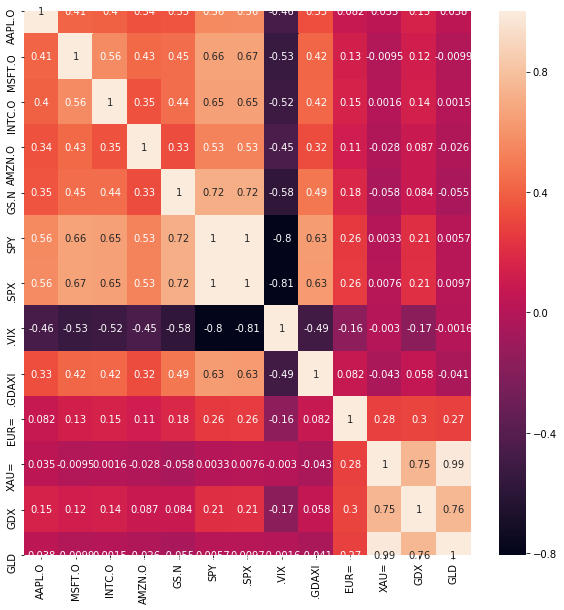

In [8]:
Matrix_corr=daily_returns.corr()
print(Matrix_corr)
plt.subplots(figsize=(10,10))
sn.heatmap(Matrix_corr,annot=True)
plt.show()

In [9]:
eigen_value,eigen_vector=np.linalg.eig(Matrix_corr)
print('Eigen vectors:',eigen_vector)
print('Eigen value:',eigen_value)

Eigen vectors: [[-2.66337728e-01  1.90722081e-03  3.34054307e-01 -2.52573230e-01
  -5.80978681e-01 -5.74843737e-01  2.07221824e-01  5.66347107e-02
  -1.57271649e-01 -2.59618254e-02 -1.18865658e-01  2.72296900e-03
  -5.37463328e-04]
 [-3.14494763e-01  4.15864588e-02  1.22535178e-01 -1.66072932e-01
  -1.28316166e-01  5.14455804e-01 -3.71850239e-03  7.45792903e-01
   2.31648249e-02 -1.70261063e-02 -1.36302948e-01 -2.42463057e-03
  -2.63781134e-03]
 [-3.06937074e-01  2.91321233e-02  5.26603261e-02  1.04022610e-02
  -3.49580973e-01  5.81026569e-01  1.12958650e-01 -6.13483852e-01
  -1.96201001e-01 -3.97412380e-02 -1.14282564e-01 -1.70912696e-03
  -1.08982616e-03]
 [-2.55036438e-01  4.64126364e-02  1.47407982e-01 -6.76861257e-01
   6.10684353e-01 -3.83987903e-02  5.46920512e-02 -1.61503843e-01
  -2.07543484e-01 -1.05928636e-02 -7.91048168e-02  5.38775637e-04
  -1.75517014e-03]
 [-3.14632440e-01  7.05520146e-02 -2.01793786e-01  3.55436254e-01
   1.12218357e-01 -1.74688594e-01 -4.67418311e-01  